In [4]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
image = cv2.imread('ramon-vloon-OYq3l_mbTxY-unsplash.jpg')

image.shape

(3285, 4921, 3)

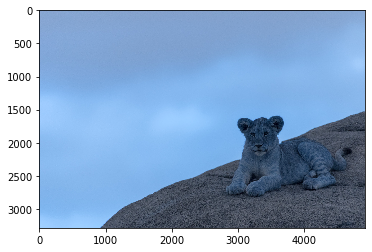

In [6]:
plt.imshow(image)

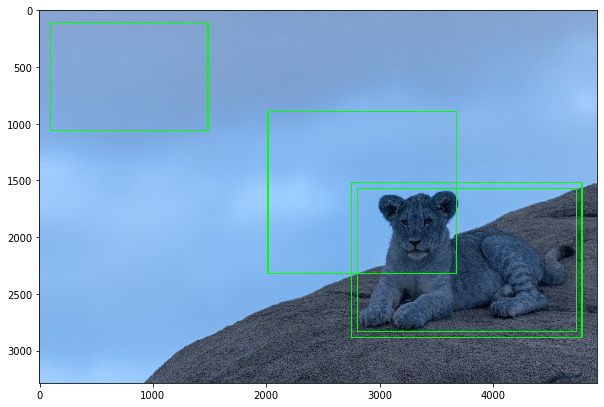

In [17]:
xgmin = int(2806.7)
ygmin = int(1573.3)
xgmax = int(4738.73)
ygmax = int(2831.92)

image1 = cv2.rectangle(img=image, rec = (xgmin, ygmin, xgmax - xgmin, ygmax - ygmin), color = (0, 255, 0), thickness=10)
plt.figure(figsize = (10,10))
plt.imshow(image1, 'gray')

In [8]:
bb_box = pd.read_excel('bounding box.xlsx')

In [9]:
bb_box

,xmin,ymin,xmax,ymax
0,2806.70,1573.30,4738.73,2831.92
1,100.72,107.01,1491.49,1063.56
2,2020.11,893.65,3681.49,2322.18
3,2756.41,1522.96,4789.08,2882.27


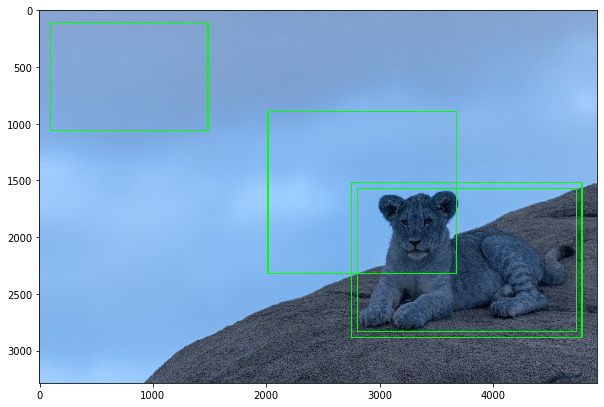

In [10]:
#let's display all of the coordinate values
for i, row in bb_box.iterrows():
    xmin = int(row['xmin'])
    ymin = int(row['ymin'])
    xmax = int(row['xmax'])
    ymax = int(row['ymax'])    
    
    image1 = cv2.rectangle(img=image, rec = (xmin, ymin, xmax - xmin, ymax - ymin), color = (0, 255, 0), thickness=10)    
    
plt.figure(figsize = (10,10))
plt.imshow(image1, 'gray')    

#### Logic for the IOU                

ground truth = (xgmin, ygmin, xgmax, ygmax)             
predicted = (xpmin, ypmin, xpmax, ypmax)            

diff1 = minimum(xgmax, xpmax) - maximum(xgmin, xpmin)       
diff2 = minimum(ygmax, ypmax) - maximum(ygmin, ypmin)           

Intersection = diff1 * diff2          

gheight = xgmax - xgmin           
gwidth = ygmax - ygmin         

pheight = xpmax - xpmin           
pwidth = ypmax - ypmin             

union(total area - intersection) = (gheight * gwidth) + (pheight * pwidth) - Intersection       

IOU = Intersection/union   

In [28]:
#let's display all of the coordinate values
for i, row in bb_box.tail(3).iterrows():
    xpmin = int(row['xmin'])
    ypmin = int(row['ymin'])
    xpmax = int(row['xmax'])
    ypmax = int(row['ymax'])    
    
    diff1 = np.minimum(xgmax, xpmax) - np.maximum(xgmin, xpmin)
    diff2 = np.minimum(ygmax, ypmax) - np.maximum(ygmin, ypmin)
    
    if diff1 <=0 or diff2 <= 0:
        print('The coordinate values:', xpmin, ypmin, xpmax, ypmax)
        print('There is no overlap')
        
    else:    
        intersection = diff1 * diff2
        
        gheight = xgmax - xgmin
        gwidth = ygmax - ygmin
    
        pheight = xpmax - xpmin
        pwidth = ypmax - ypmin
    
        union = (gheight * gwidth) + (pheight * pwidth) - intersection
    
        IOU = intersection / union 
        print('\nThe coordinate values:', xpmin, ypmin, xpmax, ypmax)
        print('The value of Intersection Over Union:',IOU)
        
print('\nCoordinate values of the ground truth:', xgmin, ygmin, xgmax, ygmax)

The coordinate values: 100 107 1491 1063
There is no overlap

The coordinate values: 2020 893 3681 2322
The value of Intersection Over Union: 0.15797307557880275

The coordinate values: 2756 1522 4789 2882
The value of Intersection Over Union: 0.8790457452041318

Coordinate values of the ground truth: 2806 1573 4738 2831


As we can see, the one with nearby coordinates with the ground truth yields higher IOU. 